<a href="https://colab.research.google.com/github/Sauravhuskie/680---assignment-2/blob/main/CSCI_680_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **CSCI 680 - k13: Asssignment 2**




### References
1.https://cherono-mj.medium.com/importing-and-exporting-datasets-to-and-from-a-google-colab-python-81fbf8a32c84

2.https://matplotlib.org/stable/gallery/statistics/hist.html

3.https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib

4.https://www.statology.org/matplotlib-random-color/

5.https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

6.https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

7.https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

8.https://colab.research.google.com/drive/1DzM-McYqFT1MgGBKQoh_nurShP13J4NY#scrollTo=KqSvKaEQZ7YR

9.https://amueller.github.io/COMS4995-s20/slides/aml-03-supervised-learning/#29


#Libraries

Follwoing libraires are used throughout the assignment. Please run this block if you get an import realted error.

In [ ]:
#follwoing libraires are used throughout the assignment
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import tabulate

#Question 1: 
Visualize the univariate distribution of each continuous variable, and the distribution of the target. Did you
notice anything? Is there something that might require special treatment? [10 Marks]




In [ ]:
#importing pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#Importing data to the workplace
#read data from a file with path ('filename.csv')
df= pd.read_csv('https://raw.githubusercontent.com/Sauravhuskie/680---assignment-2/main/AmesHousing.csv')
#to view the first 10 rows of the dataset
df1 = df.dropna(axis='columns')# dropping of Nan values


#List of Variables from the databook
#List of Nominal variables:
Nominal_Var =['MS SubClass','MS Zoning','Street','Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type','House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition' ]
# List of continous variables
Continous_var =['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd' , '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Yr Sold' , 'Enclosed Porch', 'Full Bath', 'Half Bath', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Pool Area']
# List of Ordinal variables
Ordinal_var = ['Lot Shape', 'Land Contour','Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual,Bsmt Cond', 'Bsmt Exposure','BsmtFinType,HeatingQC','Electrical', 'KitchenQual,Functional', 'FireplaceQu', 'Garage Finish', 'Garage Qual,Garage Cond', 'Paved Drive', 'Pool QC','Fence']
# List of discrete variables
Discrete_Var = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold', 'Order', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd'  ]
#List of all categorial variables
Categorical_Var = Nominal_Var + Ordinal_var + Discrete_Var
Categorical_Var


#Creating dataframes for nominal, ordinal, discrete, and target variables :
Nominal_Variables = pd.DataFrame(df1, columns = Nominal_Var).astype(str)
Nominal_Variables.columns

Continious_Variables = pd.DataFrame(df1, columns = Continous_var)
Continious_Variables.columns


Ordinal_Variables = pd.DataFrame(df1, columns = Ordinal_var).astype(str)
Continious_Variables.columns

Discrete_Variables = pd.DataFrame(df1, columns = Discrete_Var)
Discrete_Variables.columns

Categorical_Variables = pd.DataFrame(df1, columns = Categorical_Var).astype(str)
Categorical_Variables.columns

y = target = df1.SalePrice


#List of continious and Target variables for visualizations
salePrice = df.SalePrice
Lotfrontage =df['Lot Frontage']
LotArea = df['Lot Area']
Quality =df['Overall Qual']
Condition = df['Overall Cond']
salePrice = df.SalePrice 
aboveGround =df['TotRms AbvGrd']
AreaOf1stFloor = df['1st Flr SF']
AreaOf2ndFloor = df['2nd Flr SF']
GroundLivingArea = df['Gr Liv Area']
EnclosedPorch = df['Enclosed Porch']
MasVnrArea = df['Mas Vnr Area']
BasementSqurareFeet = df['BsmtFin SF 1']
BasementSquareFeet2 = df['BsmtFin SF 2']
UnfinishedBasement = df['Bsmt Unf SF']
LowQualityFinished = df['Low Qual Fin SF']
GrLivArea= df['Gr Liv Area']
WoodDeckSF = df ['Wood Deck SF']
OpenPorchSF = df['Open Porch SF']
ThreeSeasonPorch = df['3Ssn Porch']
ScreenPorch = df['Screen Porch']
PoolArea = df['Pool Area']


#Plot hist function takes a continious variable and creates univariate distribution
def PlotHist(x,y,variable,xlabel,title):
  col = (np.random.random(), np.random.random(), np.random.random())#for different color
  ax[x,y].hist(variable, edgecolor = "black", color=col) #creating edges
  ax[x,y].set_xlabel(xlabel) #creating xlabel
  ax[x,y].set_ylabel('Frequency of houses') #creating ylabel
  ax[x,y].set_title(title) #setting title
  ax[x,y].grid(True) #setting grid
  ax[x,y].patch.set_linewidth('1') # setting linewidth
  ax[x,y].locator_params(axis='x', integer=True) #creating parameters
  ax2=ax[x,y].twinx()#creating twin axis
  ax2.hist(variable, edgecolor = "black", color=col)#fixing color of the histogram


##1.1: Creating visualizations for linear and Target variables with histograms

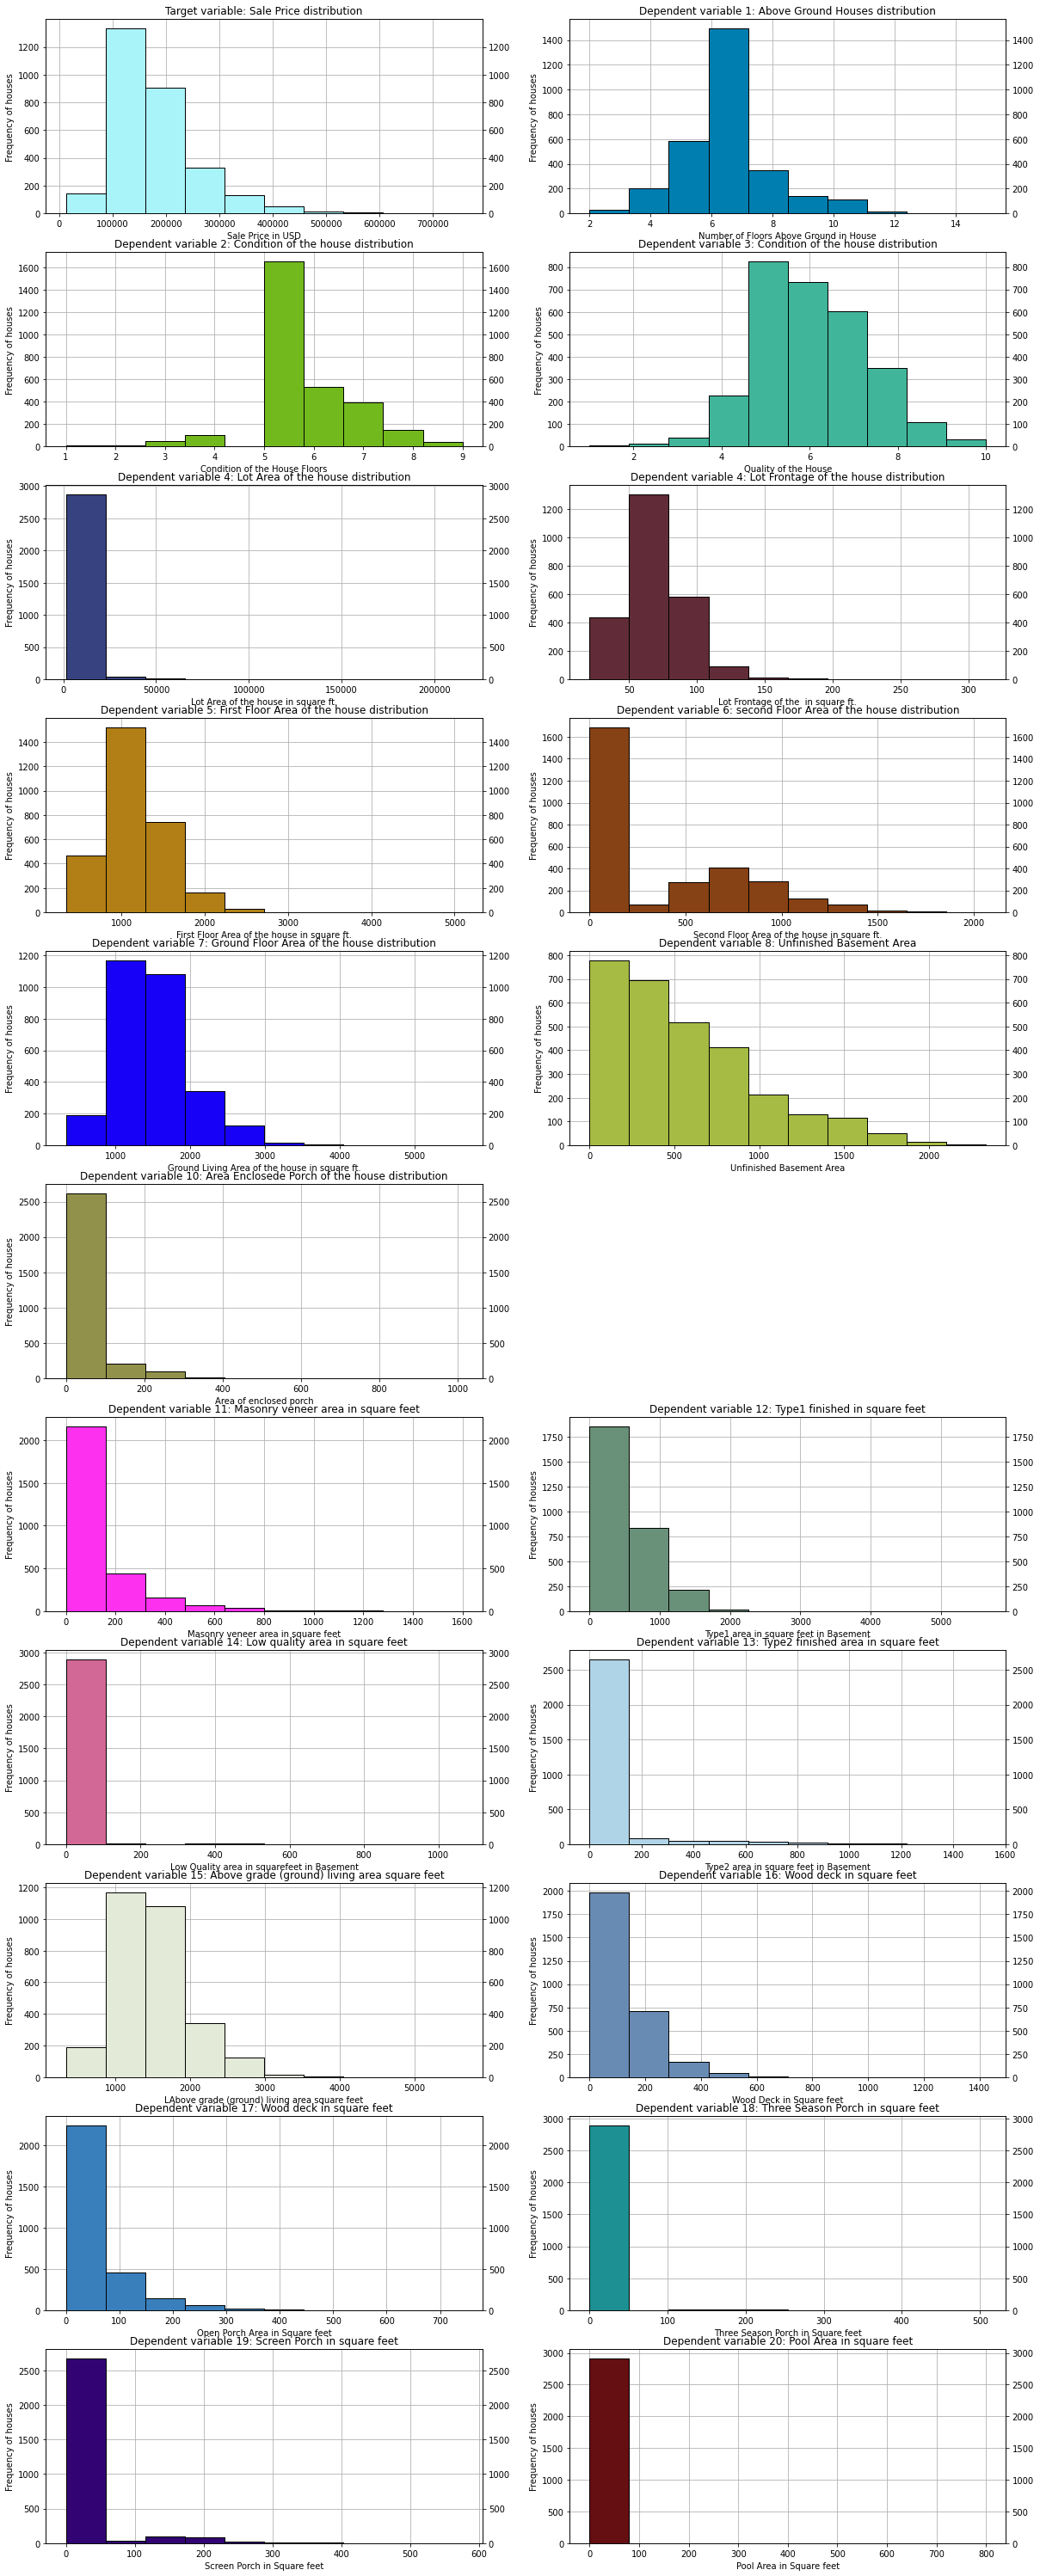

In [ ]:
###################Creating histograms around the cornesrs################
fig, ax = plt.subplots(11, 2, figsize=(20, 54))
PlotHist(0,0,salePrice, 'Sale Price in USD','Target variable: Sale Price distribution')
PlotHist(0,1,aboveGround, 'Number of Floors Above Ground in House','Dependent variable 1: Above Ground Houses distribution')
PlotHist(1,0,Condition, 'Condition of the House Floors','Dependent variable 2: Condition of the house distribution')
PlotHist(1,1,Quality, 'Quality of the House','Dependent variable 3: Condition of the house distribution')
PlotHist(2,0,LotArea, 'Lot Area of the house in square ft.','Dependent variable 4: Lot Area of the house distribution')
PlotHist(2,1,Lotfrontage, 'Lot Frontage of the  in square ft.','Dependent variable 4: Lot Frontage of the house distribution')
PlotHist(3,0,AreaOf1stFloor, 'First Floor Area of the house in square ft.','Dependent variable 5: First Floor Area of the house distribution')
PlotHist(3,1,AreaOf2ndFloor, 'Second Floor Area of the house in square ft.','Dependent variable 6: second Floor Area of the house distribution')
PlotHist(4,0,GroundLivingArea, 'Ground Living Area of the house in square ft.','Dependent variable 7: Ground Floor Area of the house distribution')
PlotHist(4,1,UnfinishedBasement, 'Unfinished Basement Area', 'Dependent variable 8: Unfinished Basement Area')
PlotHist(5,0,EnclosedPorch, 'Area of enclosed porch','Dependent variable 10: Area Enclosede Porch of the house distribution')
ax[5,1].set_visible(False)
PlotHist(6,0,MasVnrArea, 'Masonry veneer area in square feet','Dependent variable 11: Masonry veneer area in square feet') 
PlotHist(6,1,BasementSqurareFeet, 'Type1 area in square feet in Basement','Dependent variable 12: Type1 finished in square feet') 
PlotHist(7,1,BasementSquareFeet2, 'Type2 area in square feet in Basement','Dependent variable 13: Type2 finished area in square feet') 
PlotHist(7,0,LowQualityFinished, 'Low Quality area in squarefeet in Basement','Dependent variable 14: Low quality area in square feet')
PlotHist(8,0,GrLivArea, 'LAbove grade (ground) living area square feet','Dependent variable 15: Above grade (ground) living area square feet')
PlotHist(8,1,WoodDeckSF, 'Wood Deck in Square feet', 'Dependent variable 16: Wood deck in square feet' )
PlotHist(9,0,OpenPorchSF, 'Open Porch Area in Square feet', 'Dependent variable 17: Wood deck in square feet' )
PlotHist(9,1,ThreeSeasonPorch, 'Three Season Porch in Square feet', 'Dependent variable 18: Three Season Porch in square feet' )
PlotHist(10,0,ScreenPorch, 'Screen Porch in Square feet', 'Dependent variable 19: Screen Porch in square feet' )
PlotHist(10,1,PoolArea, 'Pool Area in Square feet', 'Dependent variable 20: Pool Area in square feet' )


##1.2.Did you notice anything?
Here are the observations:

1. Most houses are sold in the range of USD100,000 and USD200,00; and then it reduces gradually with increase of price.
2. Houses with 6 to 7 abobe ground floors are sold most, and then it decreases gradually.
3. Condition score 5 sales highest number of houses, and then it decreases gradually.
4. Quality score of 5 also increase number of house sales.
5. Lot Area of house upto 25,000 sales and then with increase in lot are there is not too much of a sale.
6. 50 sq ft. to 75 sq ft. Lot frontage of the house hase highest number of sales. Then it decreases gradually
7. 1000 sqft of first floor area and 0 to 250 sqft of second floor sales highest. Then both of them reduces. 
Second floor area after 0 to 250 sqft creates a almost normal distributioin.
8. Ground living area 1000 to 1500 has highest frequency of sales and thne it decreases gradually upto  5000 sq ft.



###Is there something that might require special treatment?
1. We might create a composite variable for veener area.
2. Might create a composite variable with condition of the house and quality of the house because they have almost same distribution.
3. Lot Frontage and lot area of the house might create another composite variable.

4.Target variable has almost an even distribution.



# Question Number 2:

Visualize the dependency of the target on each continuous feature (2d scatter plot). [10 Marks]

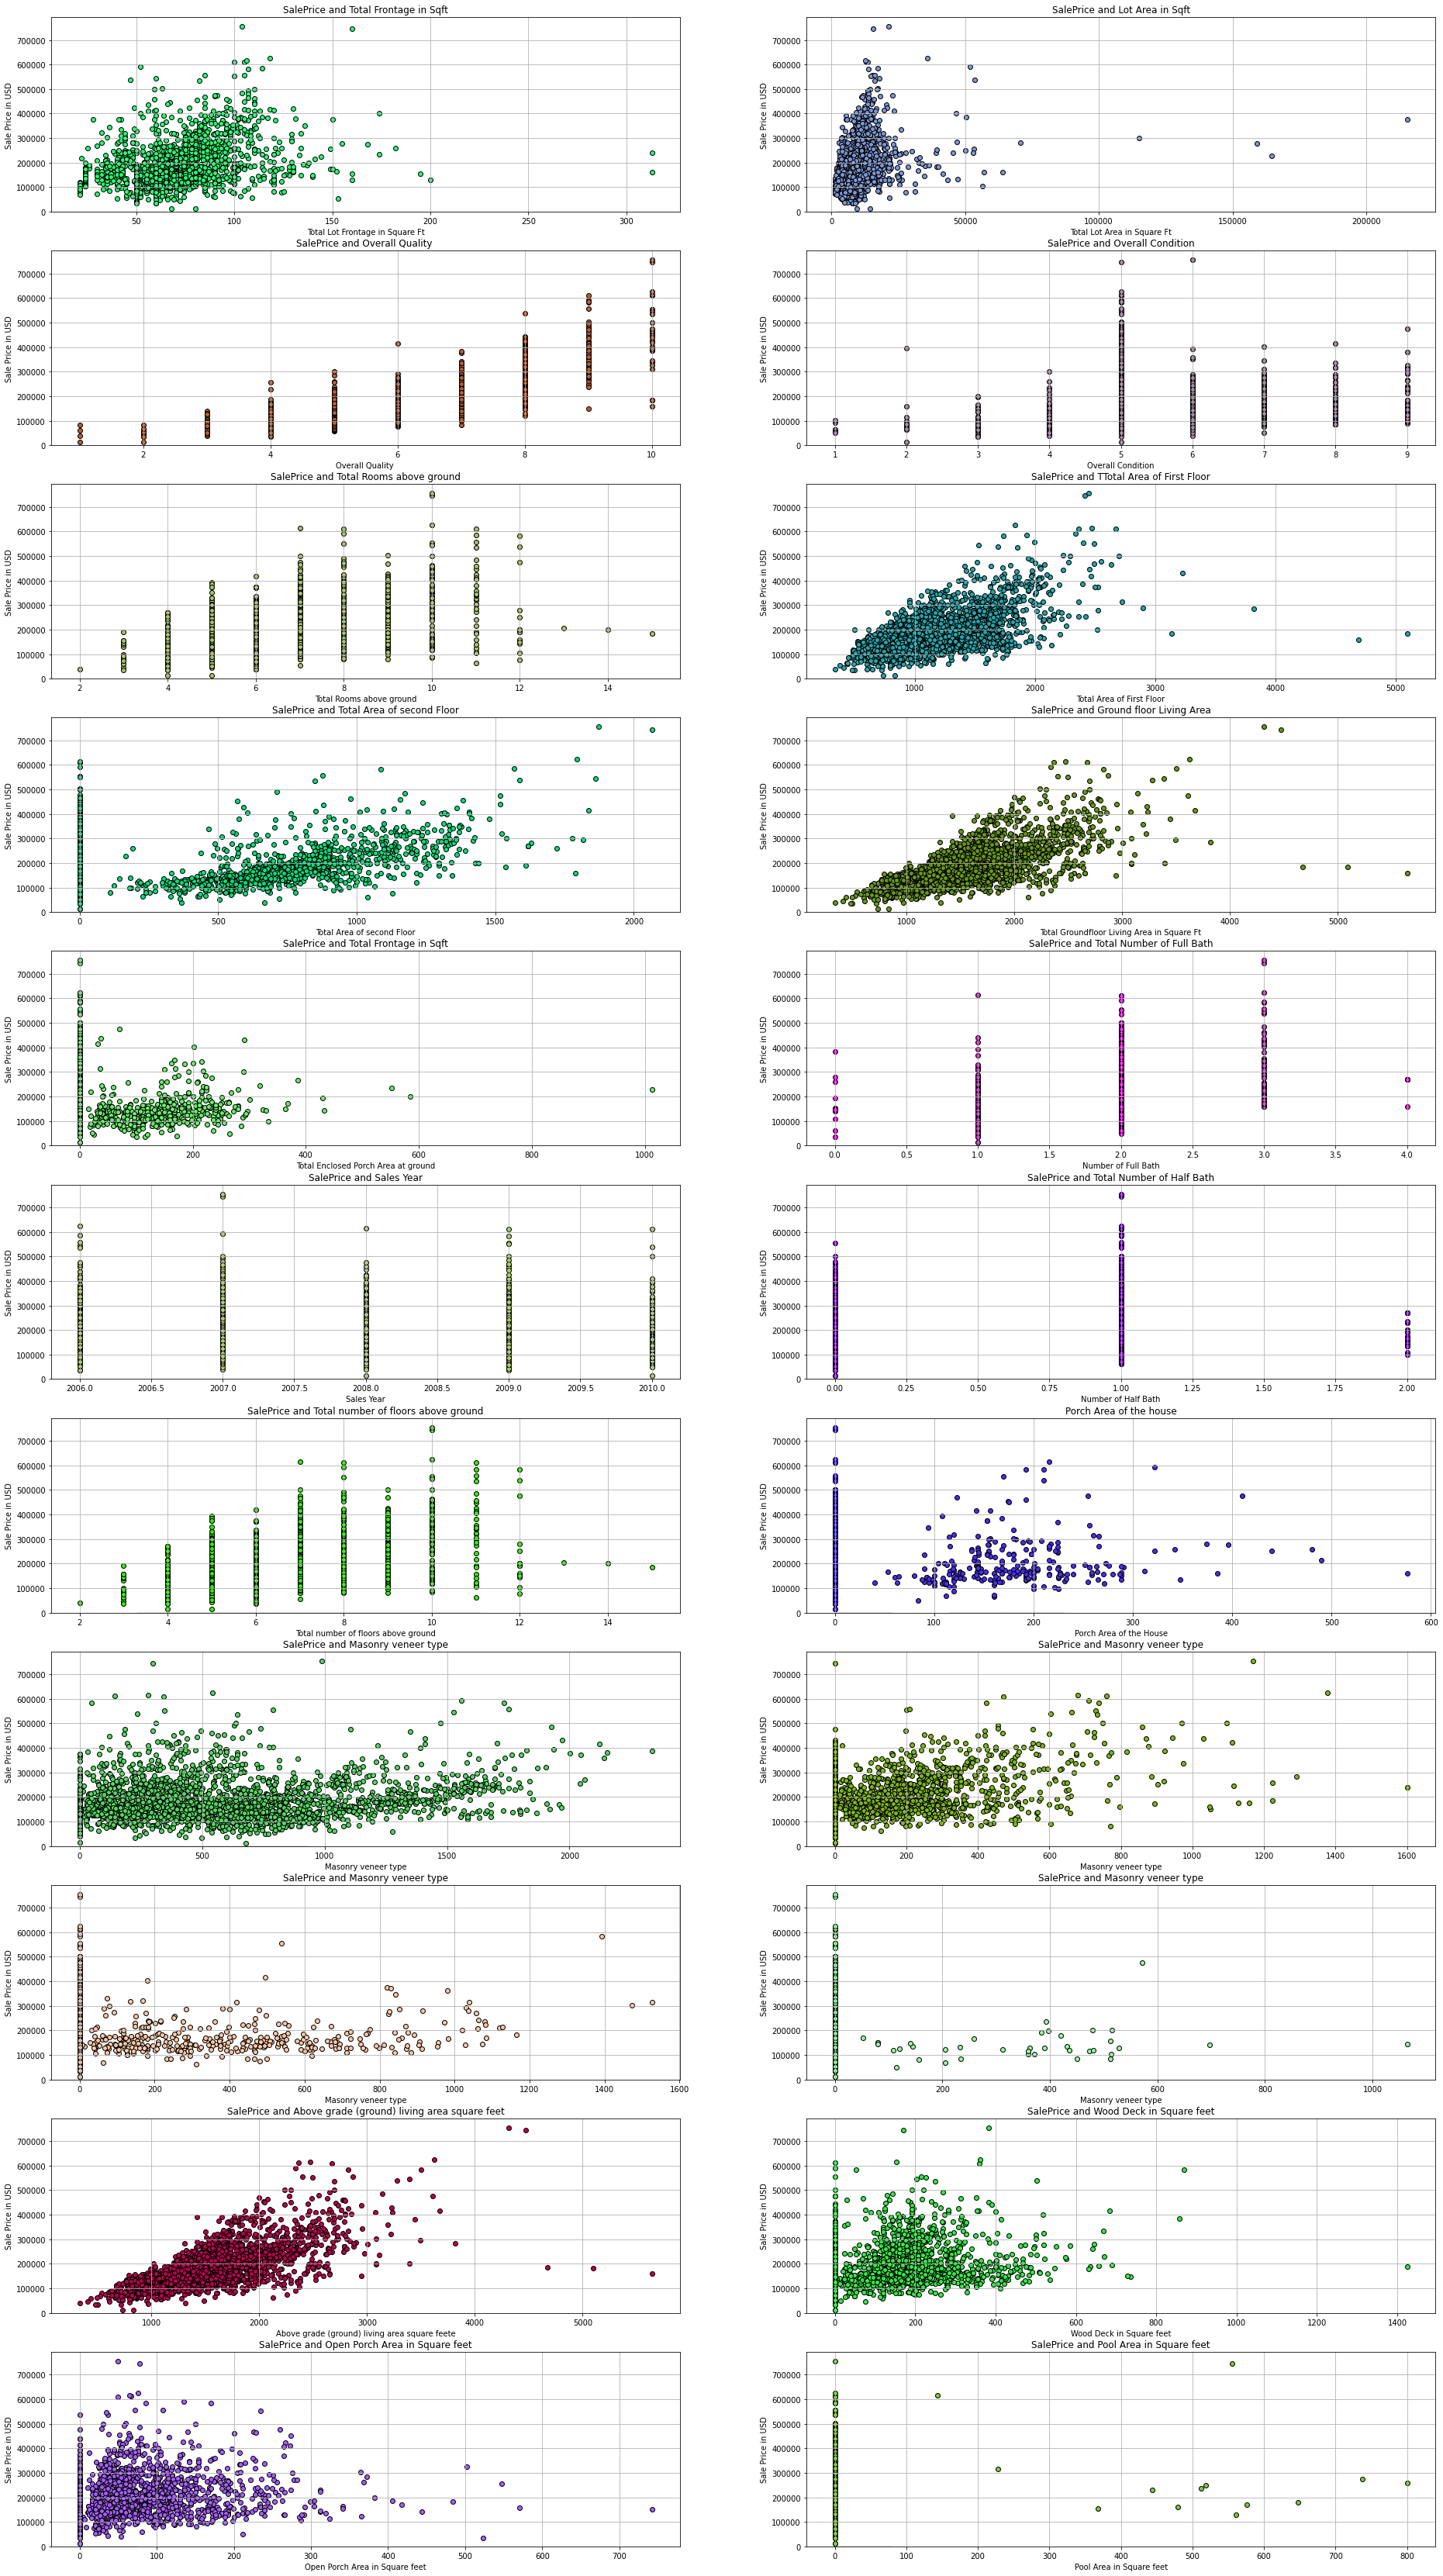

In [ ]:

# List of continous variables
salePrice = df.SalePrice
Lotfrontage =df['Lot Frontage']
LotArea = df['Lot Area']
Quality =df['Overall Qual']
Condition = df['Overall Cond']
aboveGround =df['TotRms AbvGrd']
AreaOf1stFloor = df['1st Flr SF']
AreaOf2ndFloor = df['2nd Flr SF']
GroundLivingArea = df['Gr Liv Area']
SaleYear = pd.to_numeric(df['Yr Sold'], downcast="integer")
EnclosedPorch = df['Enclosed Porch']
FullBath = df['Full Bath']
HalfBath = df['Half Bath']
MasVnrArea = df['Mas Vnr Area']
BasementSqurareFeet = df['BsmtFin SF 1']
BasementSquareFeet2 = df['BsmtFin SF 2']
UnfinishedBasement = df['Bsmt Unf SF']
LowQualityFinished = df['Low Qual Fin SF']
GrLivArea= df['Gr Liv Area']
WoodDeckSF = df ['Wood Deck SF']
OpenPorchSF = df['Open Porch SF']
ThreeSeasonPorch = df['3Ssn Porch']
ScreenPorch = df['Screen Porch']
PoolArea = df['Pool Area']


#def PlotScatter creates histogram for all dependent variables
def PlotScatter(x,y,variable,xlabel,title):
  col = (np.random.random(), np.random.random(), np.random.random())
  ax[x,y].hist(variable, edgecolor = "black", color=col, alpha= 0.1)
  ax[x,y].scatter(variable, salePrice, edgecolor = "black", color=col)
  ax[x,y].set_xlabel(xlabel)
  ax[x,y].set_ylabel('Sale Price in USD')
  ax[x,y].set_title(title)
  ax[x,y].grid(True)
  ax[x,y].patch.set_linewidth('1')

###################Creating histograms around the cornesrs################
fig, ax = plt.subplots(11, 2, figsize=(32, 60))
PlotScatter(0,0, Lotfrontage, "Total Lot Frontage in Square Ft", "SalePrice and Total Frontage in Sqft")
PlotScatter(0,1, LotArea, "Total Lot Area in Square Ft", "SalePrice and Lot Area in Sqft")
PlotScatter(1,0, Quality, "Overall Quality ", "SalePrice and Overall Quality ")
PlotScatter(1,1, Condition, "Overall Condition", "SalePrice and Overall Condition")
PlotScatter(2,0, aboveGround, "Total Rooms above ground", "SalePrice and Total Rooms above ground")
PlotScatter(2,1, AreaOf1stFloor, "Total Area of First Floor", "SalePrice and TTotal Area of First Floor")
PlotScatter(3,0, AreaOf2ndFloor, "Total Area of second Floor", "SalePrice and Total Area of second Floor")
PlotScatter(3,1, GroundLivingArea, "Total Groundfloor Living Area in Square Ft", "SalePrice and Ground floor Living Area")
PlotScatter(4,0, EnclosedPorch, "Total Enclosed Porch Area at ground", "SalePrice and Total Frontage in Sqft")
PlotScatter(4,1, FullBath, "Number of Full Bath", "SalePrice and Total Number of Full Bath")
PlotScatter(5,0, SaleYear, "Sales Year", "SalePrice and Sales Year")
PlotScatter(5,1, HalfBath, "Number of Half Bath", "SalePrice and Total Number of Half Bath")
PlotScatter(6,0, aboveGround, "Total number of floors above ground", "SalePrice and Total number of floors above ground")
PlotScatter(6,1, ScreenPorch,"Porch Area of the House", "Porch Area of the house")
PlotScatter(7,1, MasVnrArea,"Masonry veneer type", "SalePrice and Masonry veneer type")
PlotScatter(7,0, UnfinishedBasement,"Masonry veneer type", "SalePrice and Masonry veneer type")
PlotScatter(8,0, BasementSquareFeet2,"Masonry veneer type", "SalePrice and Masonry veneer type")
PlotScatter(8,1, LowQualityFinished,"Masonry veneer type", "SalePrice and Masonry veneer type")
PlotScatter(9,0, GrLivArea,"Above grade (ground) living area square feete", "SalePrice and Above grade (ground) living area square feet")
PlotScatter(9,1, WoodDeckSF,"Wood Deck in Square feet", "SalePrice and Wood Deck in Square feet")
PlotScatter(10,0, OpenPorchSF,"Open Porch Area in Square feet", "SalePrice and Open Porch Area in Square feet")
PlotScatter(10,1, PoolArea,"Pool Area in Square feet", "SalePrice and Pool Area in Square feet")

# Question Number 3:
For each categorical (nominal) variable, cross-validate a Linear Regression model using just this variable (onehot-encoded). Visualize the relationship of  the categorical variables that provide the best R^2 value with the
target. [20 Marks]


In [ ]:
#List of Nominal variables:
Nominal_Var =['SalePrice','MS SubClass','MS Zoning','Street','Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type','House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition' ]

#List of Variables from the databook
#List of Nominal variables:
Nominal_Var =['MS SubClass','MS Zoning','Street','Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type','House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition' ]
# List of continous variables
Continous_var =['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd' , '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Yr Sold' , 'Enclosed Porch', 'Full Bath', 'Half Bath', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Pool Area']
# List of Ordinal variables
Ordinal_var = ['Lot Shape', 'Land Contour','Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual,Bsmt Cond', 'Bsmt Exposure','BsmtFinType,HeatingQC','Electrical', 'KitchenQual,Functional', 'FireplaceQu', 'Garage Finish', 'Garage Qual,Garage Cond', 'Paved Drive', 'Pool QC','Fence']
# List of discrete variables
Discrete_Var = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold', 'Order', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd'  ]
#List of all categorial variables
Categorical_Var = Nominal_Var + Ordinal_var + Discrete_Var
Categorical_Var

#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import tabulate


#read data from a file with path ('filename.csv')
df= pd.read_csv('https://raw.githubusercontent.com/Sauravhuskie/680---assignment-2/main/AmesHousing.csv')
#to view the first 10 rows of the dataset
df1 = df.dropna(axis='columns')

#getting all nominal variables
Nominal_Var =['MS SubClass','MS Zoning','Street','Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type','House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition' ]

#Creating  Nominal Variables
Nominal_Variables = pd.DataFrame(df1, columns = Nominal_Var)#creating nominal variable dataframe
Categorical_Variables = pd.DataFrame(df1, columns = Categorical_Var)#creating nominal variable dataframe


#Following function takes a variable and returns average Rsquare of variables.
from tabulate import tabulate
def Linear_Regression_Score1(var_name):
  Target = df1.SalePrice.values #target continious variable
  X1 = Nominal_Variables[var_name].values #target nominal variable
  X = X1.reshape(-1,1) #reshaping to treat it as a continous variable
  ce = OneHotEncoder(handle_unknown= 'ignore').fit(X) #one hot encoding
  X = ce.transform(X).toarray()#creating array for linear regression
  LRScore = np.mean(cross_val_score(LinearRegression(), X, Target, cv=10, scoring='r2')) #getiing mean of cross validated R-score
  return [var_name, LRScore] #returning the values

rscore = [] #array to store the variables
with warnings.catch_warnings(record=True) as w:#avoiding the output of warnings
    for var in Nominal_Var: #iterating through the array
      temp=[] #temp variable
      temp =Linear_Regression_Score1(var)#Linear regression score stored on temprary
      rscore.append(temp)
print (tabulate(rscore, headers=["Variable Name", "cv-score"]))#printing the score


Variable Name        cv-score
---------------  ------------
MS SubClass      -4.21935e+23
MS Zoning         0.0322339
Street           -0.106156
Alley            -0.108651
Land Contour     -0.0652285
Lot Config       -0.0916555
Neighborhood     -2.31194e+23
Condition 1      -0.0649367
Condition 2      -1.38398e+24
Bldg Type        -0.0784753
House Style      -0.0216701
Roof Style       -0.0522606
Roof Matl        -9.71698e+24
Exterior 1st     -1.65022e+22
Exterior 2nd     -2.03106e+22
Mas Vnr Area     -0.108651
Foundation        0.206715
Heating          -3.25756e+25
Heating QC        0.130691
Central Air      -0.0209529
Garage Type      -0.108651
Sale Type        -4.37956e+22
Sale Condition    0.0442836


## Observartions and conclusion:

**The RSquared Score should range between 0 to 1.** This experiment does not produce all the variables in that range.  This experiment has been repeated 5 times with different compilers and small and large random sample datasets. Therefore the conclusion is not to do one hot encoding with LinearRegression with this categorical data. 

##Visualize the relationship of the categorical variables that provide the best R^2 value with the target.


Text(0.5, 1.0, 'R-squared value of best categorical variables \n')

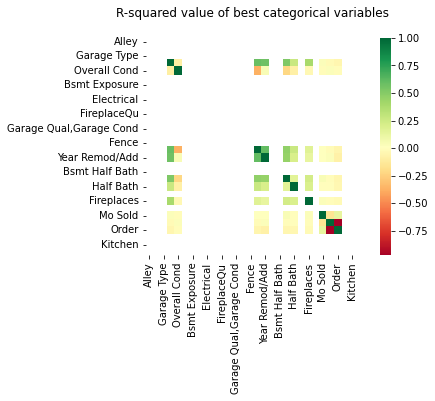

In [ ]:
drop_Variables = ['MS SubClass','Neighborhood', 'Condition 2', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Heating', 'Sale Type' ] #Dropping bad r-square variables
Categorical_Variables = Categorical_Variables.drop(drop_Variables , axis = 1) #dropping bad relation columns

#creating realtionship plot
fig,ax =plt.subplots()
ax =sns.heatmap(Categorical_Variables.corr(), square=True, cmap='RdYlGn')
ax.set_title("R-squared value of best categorical variables \n")


#Question Number 4:
Use ColumnTransformer and pipeline to encode nominal, ordinal, discrete variables. Evaluate Linear
Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling
the data (within the pipeline) with StandardScaler help? Read about ColumnTransformer below. [30 Marks]
https://scikit-learn.org/stable/modules/compose.html#column-transformer


*Steps*:

1. Use ColumnTransformer and pipeline to encode nominal, ordinal, discrete variables.
2. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters.
3. Does scaling the data (within the pipeline) with StandardScaler help?


###Nominal Variables evaluation of OLS, Ridge, Lasso and Elastic Net with column transfer and cross validation.

In [ ]:
#importing pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import warnings
from tabulate import tabulate as tab

with warnings.catch_warnings(record=True) as w:#avoiding the output of warnings

  #read data from a file with path ('filename.csv')
  df= pd.read_csv('https://raw.githubusercontent.com/Sauravhuskie/680---assignment-2/main/AmesHousing.csv')
  #to view the first 10 rows of the dataset
  df1 = df.dropna(axis='columns')

  #List of Variables
  #List of Nominal variables:
  Nominal_Var =['MS SubClass','MS Zoning','Street','Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type','House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition' ]
  # List of continous variables
  Continous_var =['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd' , '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Yr Sold' , 'Enclosed Porch', 'Full Bath', 'Half Bath', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Pool Area']
  # List of Ordinal variables
  Ordinal_var = ['Lot Shape', 'Land Contour','Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual,Bsmt Cond', 'Bsmt Exposure','BsmtFinType,HeatingQC','Electrical', 'KitchenQual,Functional', 'FireplaceQu', 'Garage Finish', 'Garage Qual,Garage Cond', 'Paved Drive', 'Pool QC','Fence']
  # List of discrete variables
  Discrete_Var = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold', 'Order', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd'  ]
  #List of all categorial variables
  Categorical_Var = Nominal_Var + Ordinal_var + Discrete_Var

  #Creating dataframes:
  Nominal_Variables = pd.DataFrame(df1, columns = Nominal_Var).astype(str)
  Nominal_Variables.columns

  Continious_Variables = pd.DataFrame(df1, columns = Continous_var)
  Continious_Variables.columns


  Ordinal_Variables = pd.DataFrame(df1, columns = Ordinal_var).astype(str)
  Continious_Variables.columns

  Discrete_Variables = pd.DataFrame(df1, columns = Discrete_Var)
  Discrete_Variables.columns

  Categorical_Variables = pd.DataFrame(df1, columns = Categorical_Var).astype(str)
  Categorical_Variables.columns

  y = df1.SalePrice

  Scores = []
  varn = 'Nominal Variable'
  varo = 'Ordinal variable'
  varc =  'Continious Variable'

  typeL = 'Linear Regression'
  typeR = 'Ridge Regression'
  typeLa = 'Lasso Regression'
  typeEN = 'Elastic-Net Regression'

  XN = Nominal_Variables
  ##Preprocessing Pipelines are created
  cat_preprocessing = make_pipeline(
      SimpleImputer(strategy="most_frequent", fill_value='NA'),
      OneHotEncoder(handle_unknown='ignore'))
  cont_preprocessing = make_pipeline(
      SimpleImputer(),
      StandardScaler())
  preprocess = make_column_transformer(
      (cat_preprocessing, make_column_selector(dtype_include='object')),
      remainder=cont_preprocessing)
  
  #train test split
  XN_train, XN_test, y_train, y_test = train_test_split(
      XN, y, random_state=0)
  #####Linear,Ridge, Lasso, and Elasticnet Regression  
  arr_olsN = cross_val_score(make_pipeline(preprocess, LinearRegression()),XN_train, y_train, cv=10)
  arr_ridgeN = cross_val_score(make_pipeline(preprocess, Ridge()),XN_train, y_train, cv=10)
  arr_LassoN = cross_val_score(make_pipeline(preprocess, Lasso()), XN_train, y_train, cv=10)
  arr_ENN = cross_val_score(make_pipeline(preprocess, ElasticNet()), XN_train, y_train, cv=10)

  Scores.append([varn,typeL,np.mean(arr_olsN)])
  Scores.append([varn,typeR,np.mean(arr_ridgeN)])
  Scores.append([varn,typeLa,np.mean(arr_LassoN)])
  Scores.append([varn,typeEN,np.mean(arr_ENN)])


  XO = Ordinal_Variables
    #train test split
  XO_train, XO_test, y_train, y_test = train_test_split(
      XO, y, random_state=0)

  arr_olsO = cross_val_score(make_pipeline(preprocess, LinearRegression()),XO_train, y_train, cv=10)
  arr_ridgeO = cross_val_score(make_pipeline(preprocess, Ridge()),XO_train, y_train, cv=10)
  arr_LassoO = cross_val_score(make_pipeline(preprocess, Lasso()), XO_train, y_train, cv=10)
  arr_ENO = cross_val_score(make_pipeline(preprocess, ElasticNet()), XO_train, y_train, cv=10)

  Scores.append([varo,typeL,np.mean(arr_olsO)])
  Scores.append([varo,typeR,np.mean(arr_ridgeO)])
  Scores.append([varo,typeLa,np.mean(arr_LassoO)])
  Scores.append([varo,typeEN,np.mean(arr_ENO)])
  
   
  Categorical_Var1 = Nominal_Var + Ordinal_var + Discrete_Var
  Categorical_Variables1 = pd.DataFrame(df1, columns = Categorical_Var1).astype(str)
  Categorical_Variables1 = Categorical_Variables1.dropna(axis='columns')
  
  drop_columns = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
   'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating', 
   'Heating QC', 'Central Air', 'Sale Type', 'Sale Condition', 'Lot Shape', 'Land Contour', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Paved Drive',
   'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold', 'Order', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd']
  Categorical_Variables1 = Categorical_Variables1.drop(drop_columns,axis=1)
  XC_train, XC_test, y_train, y_test = train_test_split(Categorical_Variables1, y, random_state=0)

  arr_olsC = cross_val_score(make_pipeline(preprocess, LinearRegression()),XC_train, y_train, cv=10)
  arr_ridgeC = cross_val_score(make_pipeline(preprocess, Ridge()),XC_train, y_train, cv=10)
  arr_LassoC= cross_val_score(make_pipeline(preprocess, Lasso()), XC_train, y_train, cv=10)
  arr_ENC = cross_val_score(make_pipeline(preprocess, ElasticNet()), XC_train, y_train, cv=10)


  Scores.append([varc,typeL,np.mean(arr_olsC)])
  Scores.append([varc,typeR,np.mean(arr_ridgeC)])
  Scores.append([varc,typeLa,np.mean(arr_LassoC)])
  Scores.append([varc,typeEN,np.mean(arr_ENC)])

  print (tab(Scores, headers=["Variable Type", "Regression Type", "10 fold cv-score"]))#printing the score
 


Variable Type        Regression Type           10 fold cv-score
-------------------  ----------------------  ------------------
Nominal Variable     Linear Regression              0.692011
Nominal Variable     Ridge Regression               0.696879
Nominal Variable     Lasso Regression               0.692633
Nominal Variable     Elastic-Net Regression         0.413054
Ordinal variable     Linear Regression             -3.50204e+22
Ordinal variable     Ridge Regression               0.734983
Ordinal variable     Lasso Regression               0.735182
Ordinal variable     Elastic-Net Regression         0.385341
Continious Variable  Linear Regression             -3.18796e+23
Continious Variable  Ridge Regression               0.743905
Continious Variable  Lasso Regression               0.743241
Continious Variable  Elastic-Net Regression         0.259241


In [ ]:
Scores_Df = pd.DataFrame(Scores, columns =["Variable Type", "Regression Type", "10 fold cv-score"])
print(Scores_Df)

          Variable Type         Regression Type  10 fold cv-score
0      Nominal Variable       Linear Regression      6.920107e-01
1      Nominal Variable        Ridge Regression      6.968794e-01
2      Nominal Variable        Lasso Regression      6.926334e-01
3      Nominal Variable  Elastic-Net Regression      4.130536e-01
4      Ordinal variable       Linear Regression     -3.502040e+22
5      Ordinal variable        Ridge Regression      7.349825e-01
6      Ordinal variable        Lasso Regression      7.351822e-01
7      Ordinal variable  Elastic-Net Regression      3.853414e-01
8   Continious Variable       Linear Regression     -3.187963e+23
9   Continious Variable        Ridge Regression      7.439048e-01
10  Continious Variable        Lasso Regression      7.432406e-01
11  Continious Variable  Elastic-Net Regression      2.592415e-01



##Does scaling the data (within the pipeline) with StandardScaler help?

Yes, standard scaler did help to increase accuracy score.



# Question Number 5:

Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence
of the validation score on the parameters for Ridge, Lasso and ElasticNet. [20 Marks]

In [ ]:
Scores_Df 


,Variable Type,Regression Type,10 fold cv-score
0,Nominal Variable,Linear Regression,6.920107e-01
1,Nominal Variable,Ridge Regression,6.968794e-01
2,Nominal Variable,Lasso Regression,6.926334e-01
3,Nominal Variable,Elastic-Net Regression,4.130536e-01
4,Ordinal variable,Linear Regression,-3.502040e+22
5,Ordinal variable,Ridge Regression,7.349825e-01
6,Ordinal variable,Lasso Regression,7.351822e-01
7,Ordinal variable,Elastic-Net Regression,3.853414e-01
8,Continious Variable,Linear Regression,-3.187963e+23
9,Continious Variable,Ridge Regression,7.439048e-01


In [ ]:
GridSearch = []

############################################ Nominal Variable with Grid Search CV #####################################################################

#importing pandas library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
from IPython.display import display




with warnings.catch_warnings(record=True) as w:

############################################ Data Preparation #####################################################################
    #read data from a file with path ('filename.csv')
    df= pd.read_csv('https://raw.githubusercontent.com/Sauravhuskie/680---assignment-2/main/AmesHousing.csv')
    #to view the first 10 rows of the dataset
    df1 = df.dropna(axis='columns')


    #List of Variables
    #List of Nominal variables:
    Nominal_Var =['MS SubClass','MS Zoning','Street','Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type','House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition' ]
    # List of continous variables
    Continous_var =['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'TotRms AbvGrd' , '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Yr Sold' , 'Enclosed Porch', 'Full Bath', 'Half Bath', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Pool Area']
    # List of Ordinal variables
    Ordinal_var = ['Lot Shape', 'Land Contour','Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual,Bsmt Cond', 'Bsmt Exposure','BsmtFinType,HeatingQC','Electrical', 'KitchenQual,Functional', 'FireplaceQu', 'Garage Finish', 'Garage Qual,Garage Cond', 'Paved Drive', 'Pool QC','Fence']
    # List of discrete variables
    Discrete_Var = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold', 'Order', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd'  ]
    #List of all categorial variables
    Categorical_Var = Nominal_Var + Ordinal_var + Discrete_Var



    #Creating dataframes:
    Nominal_Variables = pd.DataFrame(df1, columns = Nominal_Var).astype(str)
    Nominal_Variables.columns

    Continious_Variables = pd.DataFrame(df1, columns = Continous_var)
    Continious_Variables.columns


    Ordinal_Variables = pd.DataFrame(df1, columns = Ordinal_var).astype(str)
    Continious_Variables.columns

    Discrete_Variables = pd.DataFrame(df1, columns = Discrete_Var)
    Discrete_Variables.columns

    Categorical_Variables = pd.DataFrame(df1, columns = Categorical_Var).astype(str)

    drop_columns = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
   'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating', 
   'Heating QC', 'Central Air', 'Sale Type', 'Sale Condition', 'Lot Shape', 'Land Contour', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Paved Drive',
   'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold', 'Order', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd']
    Categorical_Variables = Categorical_Variables.drop(drop_columns,axis=1)
    Categorical_Variables = Categorical_Variables.dropna(axis='columns')

    XN = Nominal_Variables
    y = df1.SalePrice
    ce = OneHotEncoder().fit(XN)
    XN = ce.transform(XN).toarray()
    X_train, X_test, y_train, y_test = train_test_split(XN, y, test_size=0.35)



############################################ Ridge Regression: Nominal Variables #####################################################################
    ridgeNominalPipe = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge())
    param_grid = {"ridge__alpha" : np.logspace(-5, 5, 100)}
    gridNR = GridSearchCV(ridgeNominalPipe, param_grid, cv=5, return_train_score=True)
    gridNR.fit(X_train, y_train)
############################################ Lasso Regression: Nominal Variables #####################################################################
    lassoNominalPipe = make_pipeline(SimpleImputer(strategy='most_frequent'), Lasso())
    param_grid = {"lasso__alpha" : range(10, 2000, 100)}
    gridNL = GridSearchCV(lassoNominalPipe, param_grid, cv=5, return_train_score=True)
    gridNL.fit(X_train, y_train)
############################################ Elastic Net Regression: Nominal Variables #####################################################################
    EnNominalPipe = make_pipeline(SimpleImputer(strategy='most_frequent'), ElasticNet())
    param_grid = {'elasticnet__alpha': np.logspace(-5, -1, 10),'elasticnet__l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
    gridEnN = GridSearchCV(EnNominalPipe, param_grid, cv=5, return_train_score=True)
    gridEnN.fit(X_train, y_train)


    GridSearch =['Nan',gridNR.best_score_, gridNL.best_score_, gridEnN.best_score_, 'Nan' ]






############################################ Ridge Regression: Ordinal Variables #####################################################################

    XOrd = Ordinal_Variables
    y = df1.SalePrice
    #X = X.reshape(-1,1)
    ce = OneHotEncoder().fit(XOrd)
    XOrd = ce.transform(XOrd).toarray()
    X_train, X_test, y_train, y_test = train_test_split(XOrd, y, test_size=0.35)

    

    ridgeOrdPipe = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge())
    param_grid = {"ridge__alpha" : np.logspace(-5, 5, 100)}
    gridOR = GridSearchCV(ridgeOrdPipe, param_grid, cv=5, return_train_score=True)
    gridOR.fit(X_train, y_train)
    GridSearch.append(gridOR.best_score_)


############################################ Lasso Regression: Ordinal Variables #####################################################################
    lassOrdpipe = make_pipeline(SimpleImputer(strategy='most_frequent'), Lasso())
    param_grid = {"lasso__alpha" : range(10, 2000, 50)}
    gridOL = GridSearchCV(lassOrdpipe, param_grid, cv=5, return_train_score=True)
    gridOL.fit(X_train, y_train)
    GridSearch.append(gridOL.best_score_)

############################################ Elastic Net Regression: Ordinal Variables #####################################################################


    enOrdpipe = make_pipeline(SimpleImputer(strategy='most_frequent'), ElasticNet())
    param_grid = {'elasticnet__alpha': np.logspace(-4, -1, 10),
                    'elasticnet__l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
    gridEnO = GridSearchCV(enOrdpipe, param_grid, cv=5, return_train_score=True)
    gridEnO.fit(X_train, y_train)
    GridSearch.append(gridEnO.best_score_)
    GridSearch.append('Nan')



############################################ Ridge Regression: Categorical Variables #####################################################################


    Categorical_Variables = pd.DataFrame(df1, columns = Categorical_Var).astype(str)

    drop_columns = ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
   'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Heating', 
   'Heating QC', 'Central Air', 'Sale Type', 'Sale Condition', 'Lot Shape', 'Land Contour', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Paved Drive',
   'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'TotRmsAbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold', 'Order', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd']
    Categorical_Variables = Categorical_Variables.drop(drop_columns,axis=1)
    Categorical_Variables = Categorical_Variables.dropna(axis='columns')

    y = df1.SalePrice

    XCat = Categorical_Variables
    y = df1.SalePrice
    #X = X.reshape(-1,1)
    ce = OneHotEncoder().fit(XCat)
    XCat = ce.transform(XCat).toarray()
    
    
    ridgeCatPipe = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge())
    param_grid = {"ridge__alpha" : np.logspace(-5, 5, 100)}
    X_train, X_test, y_train, y_test = train_test_split(XCat, y, test_size=0.35)
    gridCR = GridSearchCV(ridgeCatPipe, param_grid, cv=5, return_train_score=True)
    gridCR.fit(X_train, y_train)
    GridSearch.append(gridCR.best_score_)


############################################ Lasso Regression: Categorical Variables #####################################################################
    lassoCatpipe = make_pipeline(SimpleImputer(strategy='most_frequent'), Lasso())
    param_grid = {"lasso__alpha" : range(10, 2000, 50)}
    gridCL = GridSearchCV(lassoCatpipe, param_grid, cv=5, return_train_score=True)
    gridCL.fit(X_train, y_train)
    GridSearch.append(gridCL.best_score_)

############################################ Elastic Net Regression: Categorical Variables #####################################################################

    enCatpipe = make_pipeline(SimpleImputer(strategy='most_frequent'), ElasticNet())
    param_grid = {'elasticnet__alpha': np.logspace(-4, -1, 10),
                    'elasticnet__l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
    gridEnC = GridSearchCV(enCatpipe, param_grid, cv=5, return_train_score=True)
    gridEnC.fit(X_train, y_train)
    GridSearch.append(gridEnC.best_score_)

    #Scores_Df = Scores_Df.drop(['GridSearch Average Cross Validation Scores', 'GridSearch CV Scores'], axis=1)
    DisplayScores  = Scores_Df
    DisplayScores['GridSearch CV Scores'] = GridSearch
    display(DisplayScores)




,Variable Type,Regression Type,10 fold cv-score,GridSearch CV Scores
0,Nominal Variable,Linear Regression,6.920107e-01,Nan
1,Nominal Variable,Ridge Regression,6.968794e-01,0.680882
2,Nominal Variable,Lasso Regression,6.926334e-01,0.682627
3,Nominal Variable,Elastic-Net Regression,4.130536e-01,0.680883
4,Ordinal variable,Linear Regression,-3.502040e+22,Nan
5,Ordinal variable,Ridge Regression,7.349825e-01,0.734119
6,Ordinal variable,Lasso Regression,7.351822e-01,0.737931
7,Ordinal variable,Elastic-Net Regression,3.853414e-01,0.734086
8,Continious Variable,Linear Regression,-3.187963e+23,Nan
9,Continious Variable,Ridge Regression,7.439048e-01,0.736401


## Do the results improve?
From the ABOVE table it can be concluded that results did not improve significantly for Ridge or, Lasso regression but It did improve significantly for Elastic-Net Regression.


## VISUALIZATIONS

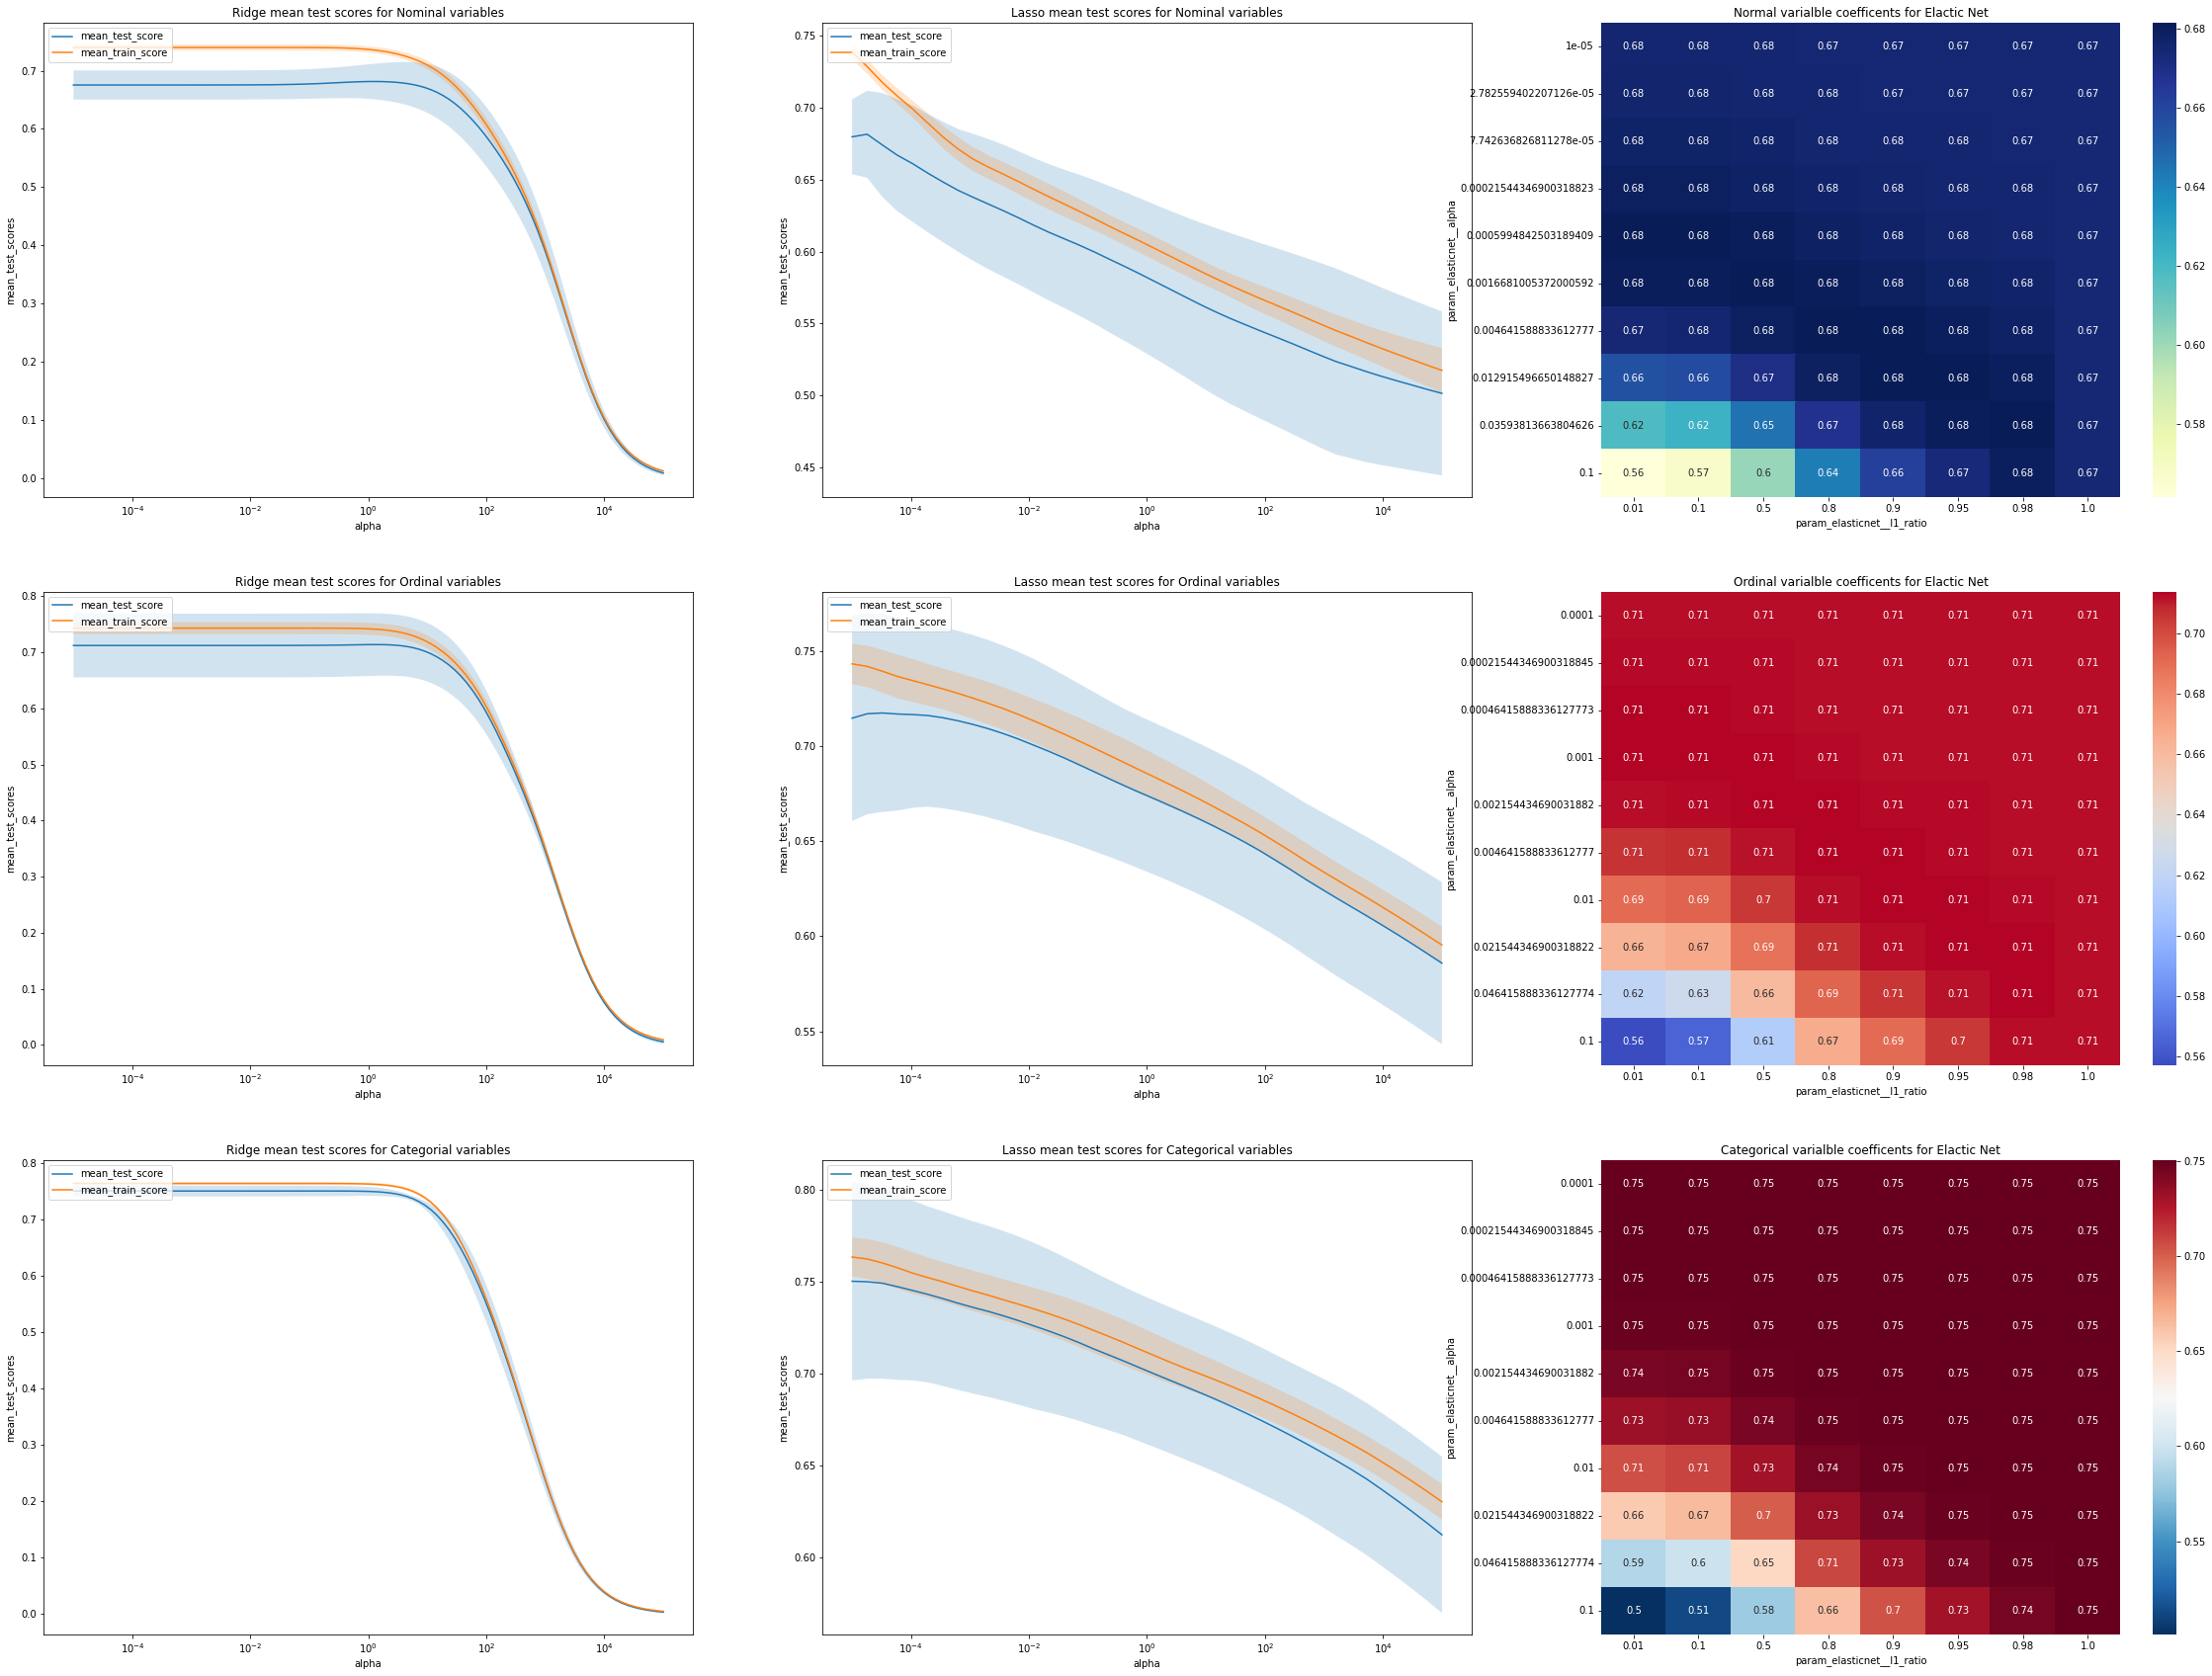

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(40, 30))

#############################################   Nominal Variables ########################################################################
gridNR_alpha = np.logspace(-5, 5, 100)
gridNR_alpha_mean_test_scores = np.asarray(gridNR.cv_results_['mean_test_score'])
gridNR_alpha_mean_train_scores = np.asarray(gridNR.cv_results_['mean_train_score'])
std_testNR = np.asarray(gridNR.cv_results_['std_test_score'])
std_trainNR = np.asarray(gridNR.cv_results_['std_train_score'])


gridNL_alpha = np.logspace(-5, 5, 40)
gridNL_alpha_mean_test_scores = np.asarray(gridNL.cv_results_['mean_test_score'])
gridNL_alpha_mean_train_scores = np.asarray(gridNL.cv_results_['mean_train_score'])
std_testNL = np.asarray(gridNL.cv_results_['std_test_score'])
std_trainNL = np.asarray(gridNL.cv_results_['std_train_score'])


ax[0,0].plot(gridNR_alpha, gridNR_alpha_mean_test_scores, label='mean_test_score')
ax[0,0].plot(gridNR_alpha, gridNR_alpha_mean_train_scores, label='mean_train_score')
ax[0,0].set_xscale("log")
ax[0,0].fill_between(gridNR_alpha, gridNR_alpha_mean_test_scores + std_testNR, gridNR_alpha_mean_test_scores - std_testNR, alpha=0.2)
ax[0,0].fill_between(gridNR_alpha, gridNR_alpha_mean_train_scores+std_trainNR, gridNR_alpha_mean_train_scores-std_trainNR, alpha=0.2)
ax[0,0].set(xlabel='alpha', ylabel='mean_test_scores', title='Ridge mean test scores for Nominal variables')
ax[0,0].legend(loc='upper left')


ax[0,1].plot(gridNL_alpha, gridNL_alpha_mean_test_scores, label='mean_test_score')
ax[0,1].plot(gridNL_alpha, gridNL_alpha_mean_train_scores, label='mean_train_score')
ax[0,1].set_xscale("log")
ax[0,1].fill_between(gridNL_alpha, gridNL_alpha_mean_test_scores + std_testNL, gridNL_alpha_mean_test_scores - std_testNL, alpha=0.2)
ax[0,1].fill_between(gridNL_alpha, gridNL_alpha_mean_train_scores+std_trainNL, gridNL_alpha_mean_train_scores-std_trainNL, alpha=0.2)
ax[0,1].set(xlabel='alpha', ylabel='mean_test_scores', title='Lasso mean test scores for Nominal variables')
ax[0,1].legend(loc='upper left')


#############################################   Ordinal Variables ########################################################################
gridOR_alpha = np.logspace(-5, 5, 100)
gridOR_alpha_mean_test_scores = np.asarray(gridOR.cv_results_['mean_test_score'])
gridOR_alpha_mean_train_scores = np.asarray(gridOR.cv_results_['mean_train_score'])
std_testOR = np.asarray(gridOR.cv_results_['std_test_score'])
std_trainOR = np.asarray(gridOR.cv_results_['std_train_score'])


gridOL_alpha = np.logspace(-5, 5, 40)
gridOL_alpha_mean_test_scores = np.asarray(gridOL.cv_results_['mean_test_score'])
gridOL_alpha_mean_train_scores = np.asarray(gridOL.cv_results_['mean_train_score'])
std_testOL = np.asarray(gridOL.cv_results_['std_test_score'])
std_trainOL = np.asarray(gridOL.cv_results_['std_train_score'])


ax[1,0].plot(gridOR_alpha, gridOR_alpha_mean_test_scores, label='mean_test_score')
ax[1,0].plot(gridOR_alpha, gridOR_alpha_mean_train_scores, label='mean_train_score')
ax[1,0].set_xscale("log")
ax[1,0].fill_between(gridNR_alpha, gridOR_alpha_mean_test_scores + std_testOR, gridOR_alpha_mean_test_scores - std_testOR, alpha=0.2)
ax[1,0].fill_between(gridNR_alpha, gridOR_alpha_mean_train_scores+std_trainOR, gridOR_alpha_mean_train_scores-std_trainOR, alpha=0.2)
ax[1,0].set(xlabel='alpha', ylabel='mean_test_scores', title='Ridge mean test scores for Ordinal variables')
ax[1,0].legend(loc='upper left')


ax[1,1].plot(gridOL_alpha, gridOL_alpha_mean_test_scores, label='mean_test_score')
ax[1,1].plot(gridOL_alpha, gridOL_alpha_mean_train_scores, label='mean_train_score')
ax[1,1].set_xscale("log")
ax[1,1].fill_between(gridOL_alpha, gridOL_alpha_mean_test_scores + std_testOL, gridOL_alpha_mean_test_scores - std_testOL, alpha=0.2)
ax[1,1].fill_between(gridOL_alpha, gridOL_alpha_mean_train_scores+std_trainOL, gridOL_alpha_mean_train_scores-std_trainOL, alpha=0.2)
ax[1,1].set(xlabel='alpha', ylabel='mean_test_scores', title='Lasso mean test scores for Ordinal variables')
ax[1,1].legend(loc='upper left')


#############################################   Categorical Variables ########################################################################
gridCR_alpha = np.logspace(-5, 5, 100)
gridCR_alpha_mean_test_scores = np.asarray(gridCR.cv_results_['mean_test_score'])
gridCR_alpha_mean_train_scores = np.asarray(gridCR.cv_results_['mean_train_score'])
std_testCR = np.asarray(gridCR.cv_results_['std_test_score'])
std_trainCR = np.asarray(gridCR.cv_results_['std_train_score'])


gridCL_alpha = np.logspace(-5, 5, 40)
gridCL_alpha_mean_test_scores = np.asarray(gridCL.cv_results_['mean_test_score'])
gridCL_alpha_mean_train_scores = np.asarray(gridCL.cv_results_['mean_train_score'])
std_testCL = np.asarray(gridCL.cv_results_['std_test_score'])
std_trainCL = np.asarray(gridCL.cv_results_['std_train_score'])


ax[2,0].plot(gridCR_alpha, gridCR_alpha_mean_test_scores, label='mean_test_score')
ax[2,0].plot(gridCR_alpha, gridCR_alpha_mean_train_scores, label='mean_train_score')
ax[2,0].set_xscale("log")
ax[2,0].fill_between(gridCR_alpha, gridCR_alpha_mean_test_scores + std_testCR, gridCR_alpha_mean_test_scores - std_testCR, alpha=0.2)
ax[2,0].fill_between(gridCR_alpha, gridCR_alpha_mean_train_scores+std_trainCR, gridCR_alpha_mean_train_scores-std_trainCR, alpha=0.2)
ax[2,0].set(xlabel='alpha', ylabel='mean_test_scores', title='Ridge mean test scores for Categorial variables')
ax[2,0].legend(loc='upper left')


ax[2,1].plot(gridCL_alpha, gridCL_alpha_mean_test_scores, label='mean_test_score')
ax[2,1].plot(gridCL_alpha, gridCL_alpha_mean_train_scores, label='mean_train_score')
ax[2,1].set_xscale("log")
ax[2,1].fill_between(gridCL_alpha, gridCL_alpha_mean_test_scores + std_testOL, gridCL_alpha_mean_test_scores - std_testOL, alpha=0.2)
ax[2,1].fill_between(gridCL_alpha, gridCL_alpha_mean_train_scores+std_trainOL, gridCL_alpha_mean_train_scores-std_trainOL, alpha=0.2)
ax[2,1].set(xlabel='alpha', ylabel='mean_test_scores', title='Lasso mean test scores for Categorical variables')
ax[2,1].legend(loc='upper left')


res = pd.pivot_table(pd.DataFrame(gridEnN.cv_results_),values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
sns.heatmap(res, annot=True, cmap="YlGnBu", ax=ax[0,2])
ax[0,2].set_title('Normal varialble  coefficents for Elactic Net')


res = pd.pivot_table(pd.DataFrame(gridEnO.cv_results_),values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
sns.heatmap(res, annot=True, cmap="coolwarm", ax=ax[1,2])
ax[1,2].set_title('Ordinal varialble coefficents for Elactic Net')

res = pd.pivot_table(pd.DataFrame(gridEnC.cv_results_),values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
sns.heatmap(res, annot=True,cmap = "RdBu_r",ax=ax[2,2])
ax[2,2].set_title('Categorical varialble coefficents for Elactic Net')

plt.show()





# Question Number 6:
 Visualize the coefficients of the resulting models. Do they agree on which features are important? [10 Marks]

In [ ]:
########################Scatter plots for Ordinal Variables###############################################################################


#####Ridge Regresion #####################################################################################################################

with warnings.catch_warnings(record=True) as w:#avoiding the output of warnings

  XN = Ordinal_Variables
  ##Preprocessing Pipelines are created
  cat_preprocessing = make_pipeline(
      SimpleImputer(strategy="most_frequent", fill_value='NA'),
      OneHotEncoder(handle_unknown='ignore'))

  cont_preprocessing = make_pipeline(
      SimpleImputer(),
      StandardScaler())
  preprocess = make_column_transformer(
      (cat_preprocessing, make_column_selector(dtype_include='object')),
      remainder=cont_preprocessing)
  
  #train test split
  XN_train, XN_test, y_train, y_test = train_test_split(XN, y, random_state=0)
 
  RidgeModel = make_pipeline(preprocess, Ridge())
  RidgeModel.fit(XN_train, y_train)
  cat_preprocessing.fit(XN_train,y_train)

  FeaturesOR = RidgeModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  coeffsOR = RidgeModel.steps[1][1].coef_

#####Lasso Regresion #####################################################################################################################
  
  LassoModel = make_pipeline(preprocess, Lasso())
  LassoModel.fit(XN_train, y_train)
  LassoModel.fit(XN_train, y_train)
  FeaturesOL = LassoModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  coeffsOL = LassoModel.steps[1][1].coef_

#####Elastic Regresion #####################################################################################################################
  
  ELModel = make_pipeline(preprocess, ElasticNet())
  ELModel.fit(XN_train, y_train)
  ELModel.fit(XN_train, y_train)
  FeaturesOE = ELModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  coeffsOE = ELModel.steps[1][1].coef_

In [ ]:


########################Scatter plots for Nominal Variables###############################################################################


#####Ridge Regresion #####################################################################################################################

with warnings.catch_warnings(record=True) as w:#avoiding the output of warnings

  XN = Nominal_Variables
  ##Preprocessing Pipelines are created
  cat_preprocessing = make_pipeline(
      SimpleImputer(strategy="most_frequent", fill_value='NA'),
      OneHotEncoder(handle_unknown='ignore'))

  cont_preprocessing = make_pipeline(
      SimpleImputer(),
      StandardScaler())
  preprocess = make_column_transformer(
      (cat_preprocessing, make_column_selector(dtype_include='object')),
      remainder=cont_preprocessing)
  
  #train test split
  XN_train, XN_test, y_train, y_test = train_test_split(XN, y, random_state=0)
 
  RidgeModel = make_pipeline(preprocess, Ridge())
  RidgeModel.fit(XN_train, y_train)
  cat_preprocessing.fit(XN_train,y_train)

  FeaturesNR = RidgeModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  CoefficientsNR = RidgeModel.steps[1][1].coef_

#####Lasso Regresion #####################################################################################################################
  
  LassoModel = make_pipeline(preprocess, Lasso())
  LassoModel.fit(XN_train, y_train)
  LassoModel.fit(XN_train, y_train)
  FeaturesNL = RidgeModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  coeffsNL = LassoModel.steps[1][1].coef_

#####Elastic Regresion #####################################################################################################################
  
  ElasticModel = make_pipeline(preprocess, ElasticNet())
  ElasticModel.fit(XN_train, y_train)
  ElasticModel.fit(XN_train, y_train)
  FeaturesNE = ElasticModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  coeffsNE = LassoModel.steps[1][1].coef_



In [ ]:
########################Scatter plots for Categorical Variables###############################################################################


#####Ridge Regresion #####################################################################################################################

with warnings.catch_warnings(record=True) as w:#avoiding the output of warnings

  XN = Categorical_Variables
  ##Preprocessing Pipelines are created
  cat_preprocessing = make_pipeline(
      SimpleImputer(strategy="most_frequent", fill_value='NA'),
      OneHotEncoder(handle_unknown='ignore'))

  cont_preprocessing = make_pipeline(
      SimpleImputer(),
      StandardScaler())
  preprocess = make_column_transformer(
      (cat_preprocessing, make_column_selector(dtype_include='object')),
      remainder=cont_preprocessing)
  
  #train test split
  XN_train, XN_test, y_train, y_test = train_test_split(XN, y, random_state=0)
 
  RidgeModel = make_pipeline(preprocess, Ridge())
  RidgeModel.fit(XN_train, y_train)
  cat_preprocessing.fit(XN_train,y_train)

  FeaturesRC = RidgeModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  coeffsRC = RidgeModel.steps[1][1].coef_

#####Lasso Regresion #####################################################################################################################
  
  LassoModel = make_pipeline(preprocess, Lasso())
  LassoModel.fit(XN_train, y_train)
  LassoModel.fit(XN_train, y_train)
  FeaturesCL = LassoModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  coeffsCL = LassoModel.steps[1][1].coef_

#####Elastic Regresion #####################################################################################################################
  
  ELModel = make_pipeline(preprocess, ElasticNet())
  ELModel.fit(XN_train, y_train)
  ELModel.fit(XN_train, y_train)
  FeaturesCE = ELModel.named_steps['columntransformer'].transformers[0][1].named_steps['onehotencoder'].get_feature_names()
  coeffsCE=ELModel.steps[1][1].coef_

###Visualizations

Text(0.5, 1.0, 'Categorical Variables Elastic Net Plots')

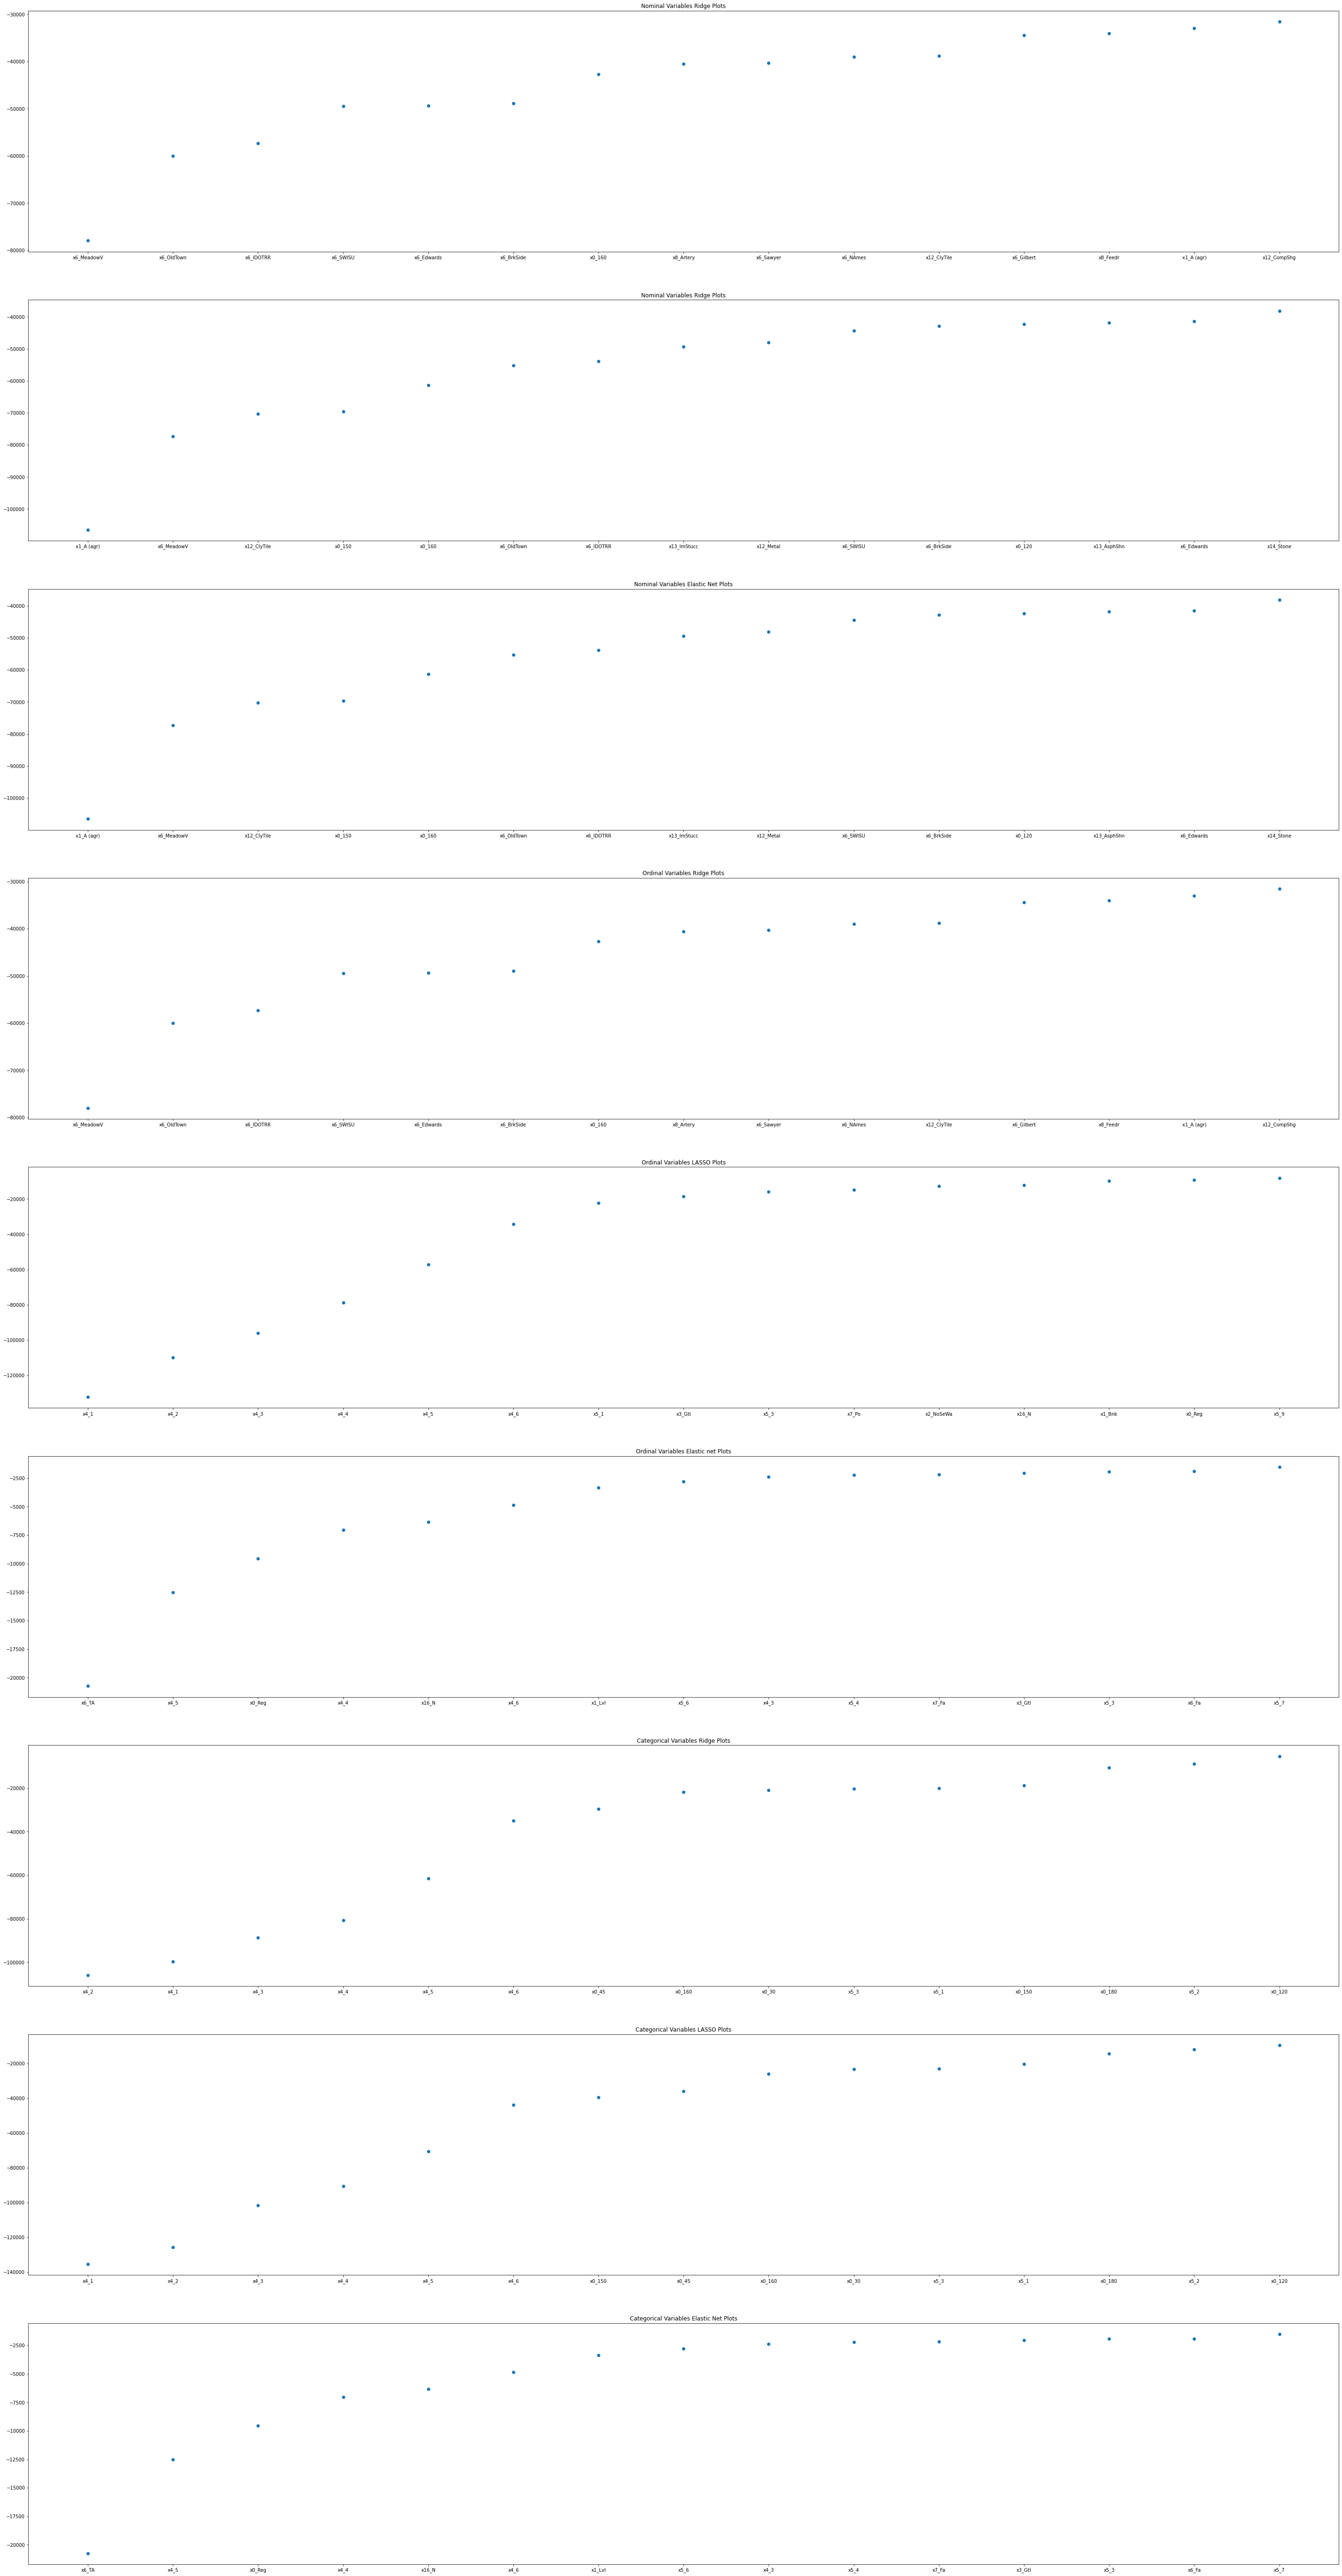

In [ ]:
fig, ax = plt.subplots(9, 1, figsize=(50,100))


NR = pd.DataFrame(list(zip(FeaturesNR, CoefficientsNR)),columns =['Features', 'val'])
NRPlot = NR.sort_values(by=['val']).head(15)
ax[0].scatter(x=NRPlot.Features, y=NRPlot.val);
ax[0].set_title("Nominal Variables Ridge Plots")


NL = pd.DataFrame(list(zip(FeaturesNL, coeffsNL)),columns =['Features', 'val'])
NLPlot = NL.sort_values(by=['val']).head(15)
ax[1].scatter(x=NLPlot.Features, y=NLPlot.val)
ax[1].set_title("Nominal Variables Ridge Plots")

NE = pd.DataFrame(list(zip(FeaturesNE, coeffsNE)),columns =['Features', 'val'])
NEPlot = NE.sort_values(by=['val']).head(15)
ax[2].scatter(x=NEPlot.Features, y=NEPlot.val)
ax[2].set_title("Nominal Variables Elastic Net Plots")

OR = pd.DataFrame(list(zip(FeaturesOR, coeffsOR)),columns =['Features', 'val'])
ORPlot = NR.sort_values(by=['val']).head(15)
ax[3].scatter(x=ORPlot.Features, y=ORPlot.val);
ax[3].set_title("Ordinal Variables Ridge Plots")


OL = pd.DataFrame(list(zip(FeaturesOL, coeffsOL)),columns =['Features', 'val'])
OLPlot = OL.sort_values(by=['val']).head(15)
ax[4].scatter(x=OLPlot.Features, y=OLPlot.val)
ax[4].set_title("Ordinal Variables LASSO Plots")

OE = pd.DataFrame(list(zip(FeaturesOE, coeffsOE)),columns =['Features', 'val'])
OEPlot = OE.sort_values(by=['val']).head(15)
ax[5].scatter(x=OEPlot.Features, y=OEPlot.val)
ax[5].set_title("Ordinal Variables Elastic net Plots")

CR = pd.DataFrame(list(zip(FeaturesRC, coeffsRC)),columns =['Features', 'val'])
CRPlot = CR.sort_values(by=['val']).head(15)
ax[6].scatter(x=CRPlot.Features, y=CRPlot.val);
ax[6].set_title("Categorical Variables Ridge Plots")


CL = pd.DataFrame(list(zip(FeaturesCL, coeffsCL)),columns =['Features', 'val'])
CLPlot = CL.sort_values(by=['val']).head(15)
ax[7].scatter(x=CLPlot.Features, y=CLPlot.val)
ax[7].set_title("Categorical Variables LASSO Plots")

CE = pd.DataFrame(list(zip(FeaturesOE, coeffsOE)),columns =['Features', 'val'])
CEPlot = CE.sort_values(by=['val']).head(15)
ax[8].scatter(x=CEPlot.Features, y=CEPlot.val)
ax[8].set_title("Categorical Variables Elastic Net Plots")
